<a href="https://colab.research.google.com/github/AshutoshSingh840/DeepLip/blob/main/DeepLip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
absolufy-imports                      0.3.1
accelerate                            1.10.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
alembic                               1.16.5
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.10.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.8.1
arrow 

In [ ]:
pip install opencv-python matplotlib imageio gdown tensorflow

In [ ]:
import os
import cv2
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from typing import List
import imageio

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

In [ ]:
import gdown
import zipfile

In [ ]:
url = 'https://drive.google.com/uc?id=1DOHhXYkZWNJdh-pH6S8uTZ8b9T3-jLcj'
output ='data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1DOHhXYkZWNJdh-pH6S8uTZ8b9T3-jLcj
From (redirected): https://drive.google.com/uc?id=1DOHhXYkZWNJdh-pH6S8uTZ8b9T3-jLcj&confirm=t&uuid=5301f263-ac47-4781-a5f4-46ecf73f9d67
To: /content/data.zip
100%|██████████| 423M/423M [00:05<00:00, 73.3MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [ ]:
def load_video(path:str) -> List[float]:
  cap=cv2.VideoCapture(path)
  frames=[]
  for i in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
    ret, frame=cap.read()
    frame = tf.image.rgb_to_grayscale(frame)
    frames.append(frame[190:236,80:220,:])
  cap.release()

  mean = tf.math.reduce_mean(frames)
  std = tf.math.reduce_std(tf.cast(frames, tf.float32))
  return tf.cast((frames - mean), tf.float32) / std

In [ ]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [ ]:
vocab

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [ ]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', np.str_('a'), np.str_('b'), np.str_('c'), np.str_('d'), np.str_('e'), np.str_('f'), np.str_('g'), np.str_('h'), np.str_('i'), np.str_('j'), np.str_('k'), np.str_('l'), np.str_('m'), np.str_('n'), np.str_('o'), np.str_('p'), np.str_('q'), np.str_('r'), np.str_('s'), np.str_('t'), np.str_('u'), np.str_('v'), np.str_('w'), np.str_('x'), np.str_('y'), np.str_('z'), np.str_("'"), np.str_('?'), np.str_('!'), np.str_('1'), np.str_('2'), np.str_('3'), np.str_('4'), np.str_('5'), np.str_('6'), np.str_('7'), np.str_('8'), np.str_('9'), np.str_(' ')] (size =40)


In [ ]:
char_to_num(['a','s','z','e'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([ 1, 19, 26,  5])>

In [ ]:
def load_alignment(path:str) -> List[str]:
  with open(path,'r') as f:
    lines = f.readlines()
  tokens = []
  for line in lines:
    line = line.split()
    if line[2] !='sil':
      tokens = [*tokens,' ',line[2]]
  return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))

In [ ]:
def load_data(path: str):
  path = bytes.decode(path.numpy())
  #file name splitting for windows
  file_name = os.path.splitext(os.path.basename(path))[0]
  video_path = os.path.join('data','s1',f'{file_name}.mpg')
  alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')

  if not os.path.exists(video_path):
      print(f'Missing video file for {file_name}, skipping ...')
      return tf.constant([], dtype=tf.float32), tf.constant([], dtype=tf.int64)

  frames = load_video(video_path)

  if os.path.exists(alignment_path):
    alignment = load_alignment(alignment_path)
  else:
    print(f'Missing alignment file for {file_name}, skipping ...')
    alignment = tf.constant([],dtype=tf.int64)
  return frames, alignment

In [ ]:
test_path = './data/s1/bbal6n.mpg'

In [ ]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

''

In [ ]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [ ]:
print(type(frames))
print(len(frames))


<class 'tensorflow.python.framework.ops.EagerTensor'>
75


In [ ]:
print(len(frames))


75


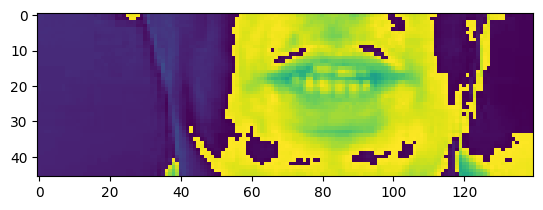

In [ ]:
plt.imshow(frames[40])

In [ ]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b' bin blue at l six now'>

In [ ]:
def mappable_function(path:str) -> List[str]:
  result = tf.py_function(load_data, [path], [tf.float32, tf.int64])
  return result

### **2. Create Data Pipeline**

In [ ]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75, None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)


In [ ]:
frames, alignments = data.as_numpy_iterator().next()

In [ ]:
len(frames)

2

In [ ]:
test = data.as_numpy_iterator()

In [ ]:
val = test.next(); val[0]

array([[[[[ 1.10365   ],
          [ 1.2939345 ],
          [ 1.484219  ],
          ...,
          [ 0.26639828],
          [ 0.26639828],
          [ 0.26639828]],

         [[ 0.53279656],
          [ 0.9514224 ],
          [ 1.3319913 ],
          ...,
          [ 0.26639828],
          [ 0.26639828],
          [ 0.26639828]],

         [[ 0.6089103 ],
          [ 1.10365   ],
          [ 1.2939345 ],
          ...,
          [ 0.26639828],
          [ 0.22834137],
          [ 0.22834137]],

         ...,

         [[ 1.1417068 ],
          [ 1.1417068 ],
          [ 1.1417068 ],
          ...,
          [ 0.07611379],
          [ 0.07611379],
          [ 0.07611379]],

         [[ 1.10365   ],
          [ 1.10365   ],
          [ 1.10365   ],
          ...,
          [ 0.07611379],
          [ 0.07611379],
          [ 0.07611379]],

         [[ 1.10365   ],
          [ 1.10365   ],
          [ 1.10365   ],
          ...,
          [ 0.07611379],
          [ 0.07611379],
          

In [ ]:
imageio.mimsave('./animation.gif', val[0][1].astype(np.uint8).squeeze(), fps = 10)

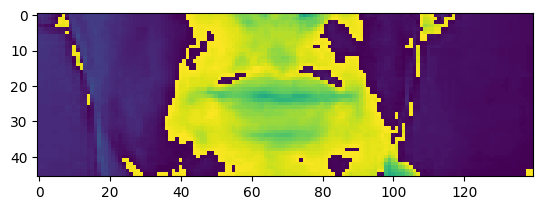

In [ ]:
# 0: videos, 0: 1st video out of the batch, 0: return the first frame in the video
plt.imshow(val[0][1][35])

In [ ]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b' set green by c six now'>

### Design the Deep Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [ ]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
import tensorflow as tf

model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

# The Reshape layer should flatten the spatial dimensions after the convolutional layers
# The input shape to TimeDistributed(Flatten()) should be (batch_size, time_steps, features)
# The features will be 5 * 17 * 75 after the MaxPool3D layers
model.add(TimeDistributed(tf.keras.layers.Reshape((5 * 17 * 75,))))


model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [ ]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_6 (Conv3D)               │ (None, 75, 46, 140,    │         3,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 75, 46, 140,    │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_6 (MaxPooling3D)  │ (None, 75, 23, 70,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_7 (Conv3D)               │ (None, 75, 23, 70,     │       884,992 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 75, 23, 70,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_7 (MaxPooling3D)  │ (None, 75, 11, 35,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_8 (Conv3D)               │ (None, 75, 11, 35, 75) │       518,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 75, 11, 35, 75) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_8 (MaxPooling3D)  │ (None, 75, 5, 17, 75)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 75, 6375)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 75, 256)        │     6,660,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 75, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 75, 41)         │        10,537 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,471,924 (32.32 MB)

 Trainable params: 8,471,924 (32.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
5*17*75

6375

In [ ]:
yhat = model.predict(val[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step


In [ ]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'77llqqqqqqqqqqq  qqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqq'>

In [ ]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'77llqqqqqqqqqqq  qqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqq'>

In [ ]:
model.input_shape

(None, 75, 46, 140, 1)

In [ ]:
model.output_shape

(None, 75, 41)

4. Setup Training Options and Train

In [ ]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [ ]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [ ]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset

    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)

In [ ]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint.weights.h5'), monitor='loss', save_weights_only=True)

In [ ]:
schedule_callback = LearningRateScheduler(scheduler)

In [ ]:
example_callback = ProduceExample(test)

In [ ]:
train = data.as_numpy_iterator()

In [ ]:
import zipfile, os, glob

zip_path = "models - checkpoint 96.zip"   # change if different
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall("models")
print("Extracted into ./models/")
!ls -la models
# show all files recursively
for p in glob.glob("models/**", recursive=True):
    print(p)


Extracted into ./models/
total 99316
drwxr-xr-x 3 root root      4096 Sep 22 10:18 .
drwxr-xr-x 1 root root      4096 Sep 22 10:18 ..
-rw-r--r-- 1 root root        77 Sep 22 10:22 checkpoint
-rw-r--r-- 1 root root 101674367 Sep 22 10:22 checkpoint.data-00000-of-00001
-rw-r--r-- 1 root root      4803 Sep 22 10:22 checkpoint.index
drwxr-xr-x 2 root root      4096 Sep 22 10:18 __MACOSX
models/
models/checkpoint
models/__MACOSX
models/checkpoint.data-00000-of-00001
models/checkpoint.index


In [ ]:
import glob, os
h5_files = glob.glob("models/**/*.h5", recursive=True)
tf_index_files = glob.glob("models/**/*.index", recursive=True)  # tf checkpoint indices
checkpoint_files = glob.glob("models/**/checkpoint", recursive=True)  # file named "checkpoint"

print("h5 files:", h5_files)
print("tf index files:", tf_index_files)
print("checkpoint files:", checkpoint_files)


h5 files: []
tf index files: ['models/checkpoint.index']
checkpoint files: ['models/checkpoint']


In [ ]:
import tensorflow as tf
import os, re

def load_latest_weights_into_model(model, models_dir="models"):
    # Try Keras 3 supported .weights.h5
    import glob
    weights_h5_files = glob.glob(os.path.join(models_dir, "**", "*.weights.h5"), recursive=True)
    if weights_h5_files:
        # pick latest modified .weights.h5
        weights_h5_files.sort(key=os.path.getmtime, reverse=True)
        weights_h5 = weights_h5_files[0]
        print("Loading .weights.h5 weights:", weights_h5)
        model.load_weights(weights_h5)
        # try to extract epoch number from filename
        m = re.search(r"(\d+)", os.path.basename(weights_h5))
        initial_epoch = int(m.group(1)) if m else 0
        return initial_epoch

    # The old checkpoint format is not directly loadable in Keras 3.
    # If you have checkpoints in the old format, you might need to load them
    # in a Keras 2 environment and resave them in a Keras 3 compatible format.
    raise FileNotFoundError("No supported checkpoints found in: " + models_dir)

# Usage (after you define model architecture):
# initial_epoch = load_latest_weights_into_model(model, models_dir="models")
# print("Resuming from epoch:", initial_epoch)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Use the same optimizer/lr & loss used originally in the notebook
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss=CTCLoss)   # or the loss function used in your notebook


In [ ]:
# set training data and test/validation as in your notebook
# e.g. train = data_as_numpy_iterator() or tf.data.Dataset, test = ...

# load weights and get initial_epoch
try:
    initial_epoch = load_latest_weights_into_model(model, models_dir="models")
except FileNotFoundError:
    print("No pre-existing weights; training from scratch.")
    initial_epoch = 0

# callbacks (example)
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

# Save weights in the Keras 3 supported .weights.h5 format
checkpoint_callback = ModelCheckpoint(os.path.join("models", "checkpoint.weights.h5"),
                                      monitor="loss",
                                      save_weights_only=True,
                                      save_best_only=False)  # pick your preferred options

# if you have a scheduler function, reuse it
schedule_callback = LearningRateScheduler(scheduler)

# resume training; pick total_epochs (e.g. 100)
total_epochs = 100
model.fit(data, # Use the tf.data.Dataset directly
          validation_data=data, # Use the tf.data.Dataset directly for validation
          epochs=total_epochs,
          initial_epoch=initial_epoch,
          callbacks=[checkpoint_callback, schedule_callback, example_callback])  # add any other callbacks you use

No pre-existing weights; training from scratch.
Epoch 1/100
144/500 ━━━━━━━━━━━━━━━━━━━━ 8:37:10 87s/step - loss: 123.1787

In [ ]:
model.fit(data, validation_data=test, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/100


InvalidArgumentError: Graph execution error:

Detected at node sequential_1/time_distributed_1/Reshape_35 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.12/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.12/asyncio/base_events.py", line 645, in run_forever

  File "/usr/lib/python3.12/asyncio/base_events.py", line 1999, in _run_once

  File "/usr/lib/python3.12/asyncio/events.py", line 88, in _run

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.12/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipython-input-217821947.py", line 1, in <cell line: 0>

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 377, in fit

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 220, in function

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 133, in multi_step_on_iterator

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 114, in one_step_on_data

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py", line 58, in train_step

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py", line 936, in __call__

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/ops/operation.py", line 58, in __call__

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/models/sequential.py", line 220, in call

  File "/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py", line 183, in call

  File "/usr/local/lib/python3.12/dist-packages/keras/src/ops/function.py", line 177, in _run_through_graph

  File "/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py", line 648, in call

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py", line 936, in __call__

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/ops/operation.py", line 58, in __call__

  File "/usr/local/lib/python3.12/dist-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/time_distributed.py", line 126, in call

  File "/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/time_distributed.py", line 120, in step_function

  File "/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py", line 54, in call

  File "/usr/local/lib/python3.12/dist-packages/keras/src/ops/numpy.py", line 5074, in reshape

  File "/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/numpy.py", line 2068, in reshape

Only one input size may be -1, not both 0 and 1
	 [[{{node sequential_1/time_distributed_1/Reshape_35}}]] [Op:__inference_multi_step_on_iterator_66818]